In [130]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import czifile
import pyqtgraph as pg
from astropy.table import Table, Column
%gui qt5

In [156]:
tab = Table.read('spot-inten-median.csv')

In [157]:
idlist = np.asarray(np.unique(tab['TrackID']))

In [158]:
idlist

array([1000000000, 1000000001, 1000000002, 1000000003, 1000000004,
       1000000005, 1000000006, 1000000007, 1000000008, 1000000009,
       1000000010, 1000000011, 1000000012, 1000000013, 1000000014,
       1000000015, 1000000016, 1000000017, 1000000018, 1000000019,
       1000000020, 1000000021])

In [159]:
def init_list_of_objects(size):
    list_of_objects = list()
    for i in range(0,size):
        list_of_objects.append( list() ) #different object reference each time
    return list_of_objects

In [162]:
tracklist = init_list_of_objects(len(idlist))    # empty list to store arrays of intensity for each track

for i in range(len(tab['TrackID'])):
    for j in range(len(idlist)):
        if tab['TrackID'][i] == idlist[j]:
            tracklist[j].append(tab['Intensity Median'][i])
            #print(idlist[j])

In [163]:
track_array = np.asarray(tracklist)

In [178]:
len(track_array[10])

170

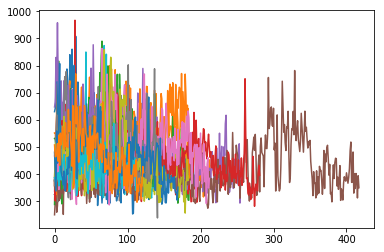

In [179]:
for i in track_array:
    plt.plot(i)

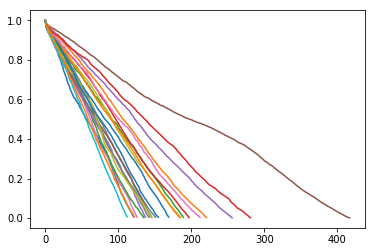

In [173]:
for i in track_array:
    ac = np.correlate(i, i, 'full')
    plt.plot(ac[np.argmax(ac):] / np.max(ac))
    
plt.xlabel(r"wait time )

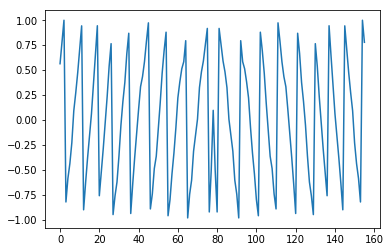

In [142]:
ac = np.correlate(track_array[20], track_array[20], 'same')
plt.plot(ac / np.max(ac))

In [143]:
len(track_array[50])

IndexError: index 50 is out of bounds for axis 0 with size 22

In [144]:
fname = 'testfile.czi'

In [145]:
im2 = czifile.imread(fname)
im2.shape


(1, 1, 1, 1126, 10, 120, 120, 1)

In [146]:
im2 = np.squeeze(im2)
im2.shape

(1126, 10, 120, 120)

In [147]:
im = pg.image(im2[1, :, 15, :])

pg.image(im)

TypeError: Image must be NumPy array or any object that provides compatible attributes/methods:
  ['dtype', 'max', 'min', 'ndim', 'shape', 'size']

In [ ]:
pg.image(im2[:, :, :, :].sum(1))